<a href="https://colab.research.google.com/github/HazemmoAlsady/Sentimental_Analysis/blob/main/RNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [18]:
!pip install tensorflow matplotlib scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")   # اسم الملف حسب عندك
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# **PreProcessing**

In [4]:
# Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", " ", text)          # remove HTML tags
    text = re.sub(r"[^a-zA-Z]", " ", text)      # remove special chars
    text = re.sub(r"\s+", " ", text).strip()    # remove double spaces
    return text

df["review"] = df["review"].apply(clean_text)

# Encode sentiment
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative": 0})

# **Split data to Train/Test**

In [14]:
X = df["review"].values
y = df["sentiment"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# **Tokenization**

In [15]:
vocab_size = 20000
max_len = 150

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding="post")
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding="post")


# **Simple RNN**

In [19]:
model = Sequential([
    Input(shape=(max_len,)),
    Embedding(vocab_size, 128),
    SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 150, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601,217 (9.92 MB)

 Trainable params: 2,601,217 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    X_train_padded, y_train,
    validation_split=0.2,
    epochs=8,
    batch_size=64,
    callbacks=[es],
    verbose=2
)


Epoch 1/8
500/500 - 15s - 30ms/step - accuracy: 0.5017 - loss: 0.7015 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/8
500/500 - 16s - 31ms/step - accuracy: 0.4984 - loss: 0.7012 - val_accuracy: 0.5148 - val_loss: 0.6931
Epoch 3/8
500/500 - 8s - 15ms/step - accuracy: 0.5053 - loss: 0.6945 - val_accuracy: 0.5142 - val_loss: 0.6916
Epoch 4/8
500/500 - 15s - 30ms/step - accuracy: 0.5306 - loss: 0.6885 - val_accuracy: 0.5405 - val_loss: 0.6812
Epoch 5/8
500/500 - 16s - 31ms/step - accuracy: 0.5871 - loss: 0.6549 - val_accuracy: 0.5633 - val_loss: 0.6751
Epoch 6/8
500/500 - 8s - 16ms/step - accuracy: 0.6210 - loss: 0.6125 - val_accuracy: 0.5739 - val_loss: 0.6765
Epoch 7/8
500/500 - 10s - 20ms/step - accuracy: 0.6592 - loss: 0.5679 - val_accuracy: 0.5756 - val_loss: 0.6870


# **Evaluation**

In [21]:
loss, acc = model.evaluate(X_test_padded, y_test, verbose=0)
print(f"Test Accuracy = {acc * 100:.2f}%")


Test Accuracy = 55.89%


In [ ]:
vocab_size = 20000
max_len = 250

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding="post")
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding="post")


# **Build GRU Model**

In [22]:
model = Sequential([
    Input(shape=(max_len,)),
    Embedding(vocab_size, 128),
    GRU(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 150, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,667,393 (10.18 MB)

 Trainable params: 2,667,393 (10.18 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    X_train_padded, y_train,
    validation_split=0.2,
    epochs=8,
    batch_size=64,
    callbacks=[es],
    verbose=2
)


Epoch 1/8
500/500 - 195s - 391ms/step - accuracy: 0.6536 - loss: 0.5955 - val_accuracy: 0.8322 - val_loss: 0.3862
Epoch 2/8
500/500 - 175s - 350ms/step - accuracy: 0.8802 - loss: 0.2973 - val_accuracy: 0.8799 - val_loss: 0.2893
Epoch 3/8
500/500 - 178s - 355ms/step - accuracy: 0.9335 - loss: 0.1818 - val_accuracy: 0.8789 - val_loss: 0.2965
Epoch 4/8
500/500 - 144s - 289ms/step - accuracy: 0.9627 - loss: 0.1085 - val_accuracy: 0.8675 - val_loss: 0.3897


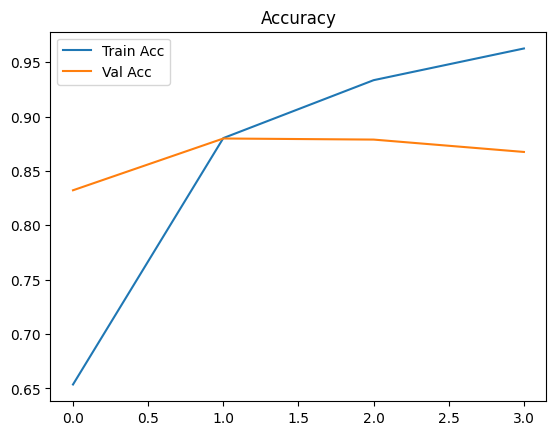

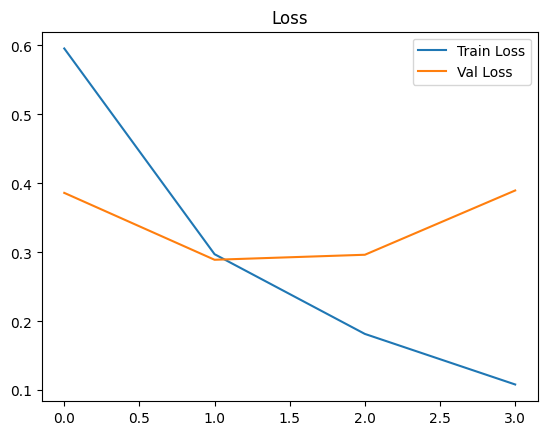

In [25]:
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss")
plt.legend()
plt.show()


In [24]:
loss, acc = model.evaluate(X_test_padded, y_test, verbose=0)
print(f"Test Accuracy = {acc * 100:.2f}%")


Test Accuracy = 88.24%
